In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import url
import numpy as np

In [2]:
#connecting to database and reading in salaries, employees, and titles

engine = create_engine(url)
conn = engine.connect()


In [3]:
salaries = pd.read_sql("SELECT * FROM salaries", conn)
employees = pd.read_sql("SELECT * FROM employees", conn)
titles = pd.read_sql("SELECT * FROM titles", conn)

In [4]:
#set bins and plot histogram
salaries.min()

employee_number    100000
salary              40000
dtype: object

In [5]:
salaries.max()

employee_number     99999
salary             129492
dtype: object

In [6]:
salaries.median()

employee_number    249987.5
salary              48681.0
dtype: float64

In [7]:
bins = np.arange(40000,130001,5000)

In [52]:
x=bins[:-1]

In [57]:
xticks=[]

for i in range(0, len(bins)-1):
    formatted = "${:,}".format(bins[i])
    formatted_next = "${:,}".format(bins[i+1])
    xticks.append(f"{formatted} - {formatted_next}")

In [59]:
xticks

['$40,000 - $45,000',
 '$45,000 - $50,000',
 '$50,000 - $55,000',
 '$55,000 - $60,000',
 '$60,000 - $65,000',
 '$65,000 - $70,000',
 '$70,000 - $75,000',
 '$75,000 - $80,000',
 '$80,000 - $85,000',
 '$85,000 - $90,000',
 '$90,000 - $95,000',
 '$95,000 - $100,000',
 '$100,000 - $105,000',
 '$105,000 - $110,000',
 '$110,000 - $115,000',
 '$115,000 - $120,000',
 '$120,000 - $125,000',
 '$125,000 - $130,000']

<function matplotlib.pyplot.show(close=None, block=None)>

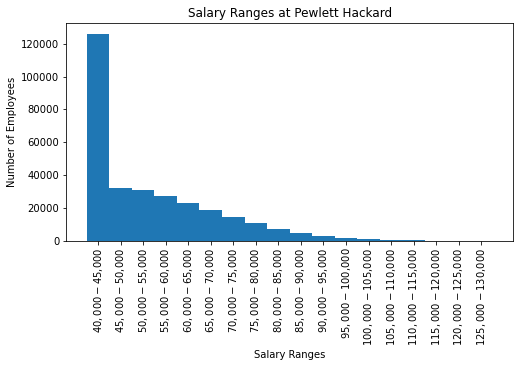

In [58]:
plt.figure(figsize=(8,4))

plt.title("Salary Ranges at Pewlett Hackard")

plt.hist(x=salaries["salary"], bins=bins)

plt.xticks(x+2500, xticks, rotation=90)

plt.xlabel("Salary Ranges")
plt.ylabel("Number of Employees")



plt.show

In [ ]:
#find average salaries by title

In [60]:
salaries.columns

Index(['employee_number', 'salary'], dtype='object')

In [61]:
employees.columns

Index(['employee_number', 'title_id', 'dob', 'first_name', 'last_name', 'sex',
       'hire_date'],
      dtype='object')

In [62]:
titles.columns

Index(['title_id', 'title'], dtype='object')

In [63]:
emp_sal = employees.merge(salaries, how="inner", on='employee_number')

In [64]:
emp_sal_title = emp_sal.merge(titles, how="inner", on="title_id")

In [65]:
grouped_title = emp_sal_title.groupby("title")

In [66]:
avg_salaries = grouped_title["salary"].mean()

In [67]:
#plot bar graph
x = np.arange(len(avg_salaries))
labels = avg_salaries.index
width = .5

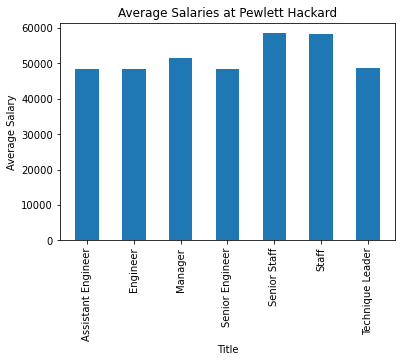

In [75]:
plt.title("Average Salaries at Pewlett Hackard")

plt.ylabel("Average Salary")
plt.xlabel("Title")

plt.xticks(ticks = x, labels = labels, rotation=90)

plt.bar(x,avg_salaries, width)
plt.show()

In [70]:
#epilogue

employees.loc[employees['employee_number'] == 499942,:]

,employee_number,title_id,dob,first_name,last_name,sex,hire_date
168736,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
